In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_train = X_train.reshape(-1, 784).astype('float32') / 255.0
X_test = X_test.reshape(-1, 784).astype('float32') / 255.0

In [6]:
X_train.shape

(60000, 784)

In [7]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [8]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [10]:
y_train[2]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [11]:
# Define model architecture parameters
input_num_units = 784
hidden1_num_units = 500
hidden2_num_units = 500
hidden3_num_units = 500
hidden4_num_units = 500
hidden5_num_units = 500
output_num_units = 10
epochs = 10
batch_size = 128

In [12]:
model_simple = Sequential([
    Dense(hidden1_num_units, input_dim=input_num_units, activation='relu'),
    Dense(hidden2_num_units, activation='relu'),
    Dense(hidden3_num_units, activation='relu'),
    Dense(hidden4_num_units, activation='relu'),
    Dense(hidden5_num_units, activation='relu'),
    Dense(output_num_units, activation='softmax'),
])

In [13]:
model_simple.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
history_simple = model_simple.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))

Epoch 1/10
469/469 [==============================] - 9s 9ms/step - loss: 0.2270 - accuracy: 0.9312 - val_loss: 0.1161 - val_accuracy: 0.9641
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0953 - accuracy: 0.9722 - val_loss: 0.1008 - val_accuracy: 0.9683
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0669 - accuracy: 0.9797 - val_loss: 0.0856 - val_accuracy: 0.9756
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0512 - accuracy: 0.9841 - val_loss: 0.0802 - val_accuracy: 0.9769
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0449 - accuracy: 0.9864 - val_loss: 0.0905 - val_accuracy: 0.9754
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0368 - accuracy: 0.9892 - val_loss: 0.0798 - val_accuracy: 0.9787
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0333 - accuracy: 0.9900 - val_loss: 0.0773 - val_accuracy: 0.9802
Epoch 

In [15]:
# 2. Neural Network with L2 Regularization
model_l2 = Sequential([
    Dense(hidden1_num_units, input_dim=input_num_units, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    Dense(hidden2_num_units, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    Dense(hidden3_num_units, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    Dense(hidden4_num_units, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    Dense(hidden5_num_units, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    Dense(output_num_units, activation='softmax'),
])

model_l2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_l2 = model_l2.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))

Epoch 1/10
469/469 [==============================] - 5s 7ms/step - loss: 0.4112 - accuracy: 0.9316 - val_loss: 0.2757 - val_accuracy: 0.9640
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.2488 - accuracy: 0.9706 - val_loss: 0.2482 - val_accuracy: 0.9668
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.2053 - accuracy: 0.9775 - val_loss: 0.2236 - val_accuracy: 0.9702
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1739 - accuracy: 0.9810 - val_loss: 0.1920 - val_accuracy: 0.9754
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1527 - accuracy: 0.9841 - val_loss: 0.1756 - val_accuracy: 0.9763
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1407 - accuracy: 0.9850 - val_loss: 0.1628 - val_accuracy: 0.9784
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1319 - accuracy: 0.9856 - val_loss: 0.1830 - val_accuracy: 0.9706
Epoch 

In [16]:
# 3. Neural Network with L1 Regularization
model_l1 = Sequential([
    Dense(hidden1_num_units, input_dim=input_num_units, activation='relu', kernel_regularizer=regularizers.l1(0.0001)),
    Dense(hidden2_num_units, activation='relu', kernel_regularizer=regularizers.l1(0.0001)),
    Dense(hidden3_num_units, activation='relu', kernel_regularizer=regularizers.l1(0.0001)),
    Dense(hidden4_num_units, activation='relu', kernel_regularizer=regularizers.l1(0.0001)),
    Dense(hidden5_num_units, activation='relu', kernel_regularizer=regularizers.l1(0.0001)),
    Dense(output_num_units, activation='softmax'),
])

model_l1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_l1 = model_l1.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))

Epoch 1/10
469/469 [==============================] - 4s 6ms/step - loss: 2.2386 - accuracy: 0.9226 - val_loss: 1.1265 - val_accuracy: 0.9622
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.8117 - accuracy: 0.9596 - val_loss: 0.5971 - val_accuracy: 0.9607
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.4852 - accuracy: 0.9666 - val_loss: 0.4017 - val_accuracy: 0.9698
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.3552 - accuracy: 0.9728 - val_loss: 0.3181 - val_accuracy: 0.9728
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.2966 - accuracy: 0.9749 - val_loss: 0.2920 - val_accuracy: 0.9708
Epoch 6/10
469/469 [==============================] - 3s 5ms/step - loss: 0.2611 - accuracy: 0.9772 - val_loss: 0.2530 - val_accuracy: 0.9752
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2362 - accuracy: 0.9789 - val_loss: 0.2553 - val_accuracy: 0.9729
Epoch 

In [17]:
model_dropout = Sequential([
    Dense(hidden1_num_units, input_dim=input_num_units, activation='relu'),
    Dropout(0.25),
    Dense(hidden2_num_units, activation='relu'),
    Dropout(0.25),
    Dense(hidden3_num_units, activation='relu'),
    Dropout(0.25),
    Dense(hidden4_num_units, activation='relu'),
    Dropout(0.25),
    Dense(hidden5_num_units, activation='relu'),
    Dropout(0.25),
    Dense(output_num_units, activation='softmax'),
])

In [18]:
model_dropout.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_dropout = model_dropout.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))

Epoch 1/10
469/469 [==============================] - 6s 7ms/step - loss: 0.3267 - accuracy: 0.8979 - val_loss: 0.1304 - val_accuracy: 0.9624
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1450 - accuracy: 0.9586 - val_loss: 0.0968 - val_accuracy: 0.9722
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1092 - accuracy: 0.9688 - val_loss: 0.0915 - val_accuracy: 0.9756
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0915 - accuracy: 0.9736 - val_loss: 0.1111 - val_accuracy: 0.9712
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0808 - accuracy: 0.9771 - val_loss: 0.0762 - val_accuracy: 0.9800
Epoch 6/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0727 - accuracy: 0.9787 - val_loss: 0.0745 - val_accuracy: 0.9812
Epoch 7/10
469/469 [==============================] - 3s 5ms/step - loss: 0.0618 - accuracy: 0.9819 - val_loss: 0.0766 - val_accuracy: 0.9806
Epoch 

In [19]:
# 5. Neural Network with Early Stopping
model_early_stopping = Sequential([
    Dense(hidden1_num_units, input_dim=input_num_units, activation='relu'),
    Dense(hidden2_num_units, activation='relu'),
    Dense(hidden3_num_units, activation='relu'),
    Dense(hidden4_num_units, activation='relu'),
    Dense(hidden5_num_units, activation='relu'),
    Dense(output_num_units, activation='softmax'),
])

model_early_stopping.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_accuracy', patience=2)
history_early_stopping = model_early_stopping.fit(X_train, y_train, epochs=100, batch_size=batch_size, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/100
469/469 [==============================] - 4s 5ms/step - loss: 0.2276 - accuracy: 0.9316 - val_loss: 0.1010 - val_accuracy: 0.9679
Epoch 2/100
469/469 [==============================] - 2s 5ms/step - loss: 0.0957 - accuracy: 0.9714 - val_loss: 0.1005 - val_accuracy: 0.9689
Epoch 3/100
469/469 [==============================] - 2s 5ms/step - loss: 0.0679 - accuracy: 0.9798 - val_loss: 0.0664 - val_accuracy: 0.9802
Epoch 4/100
469/469 [==============================] - 2s 5ms/step - loss: 0.0532 - accuracy: 0.9845 - val_loss: 0.0914 - val_accuracy: 0.9742
Epoch 5/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0425 - accuracy: 0.9871 - val_loss: 0.1057 - val_accuracy: 0.9735


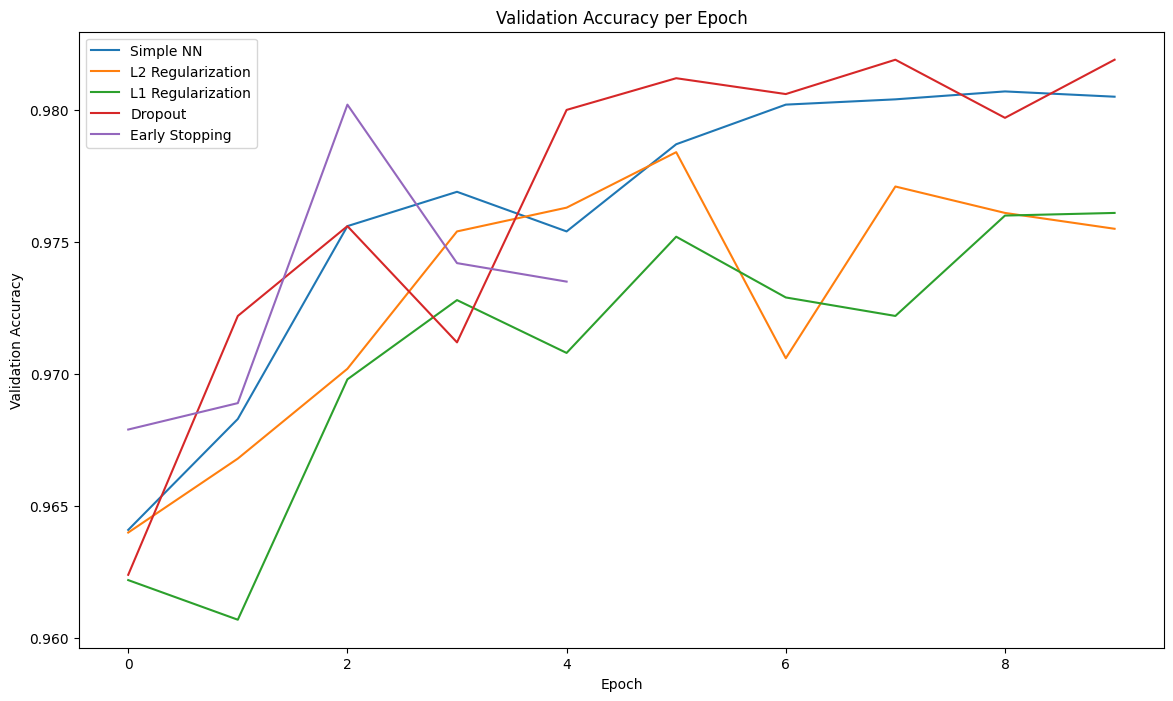

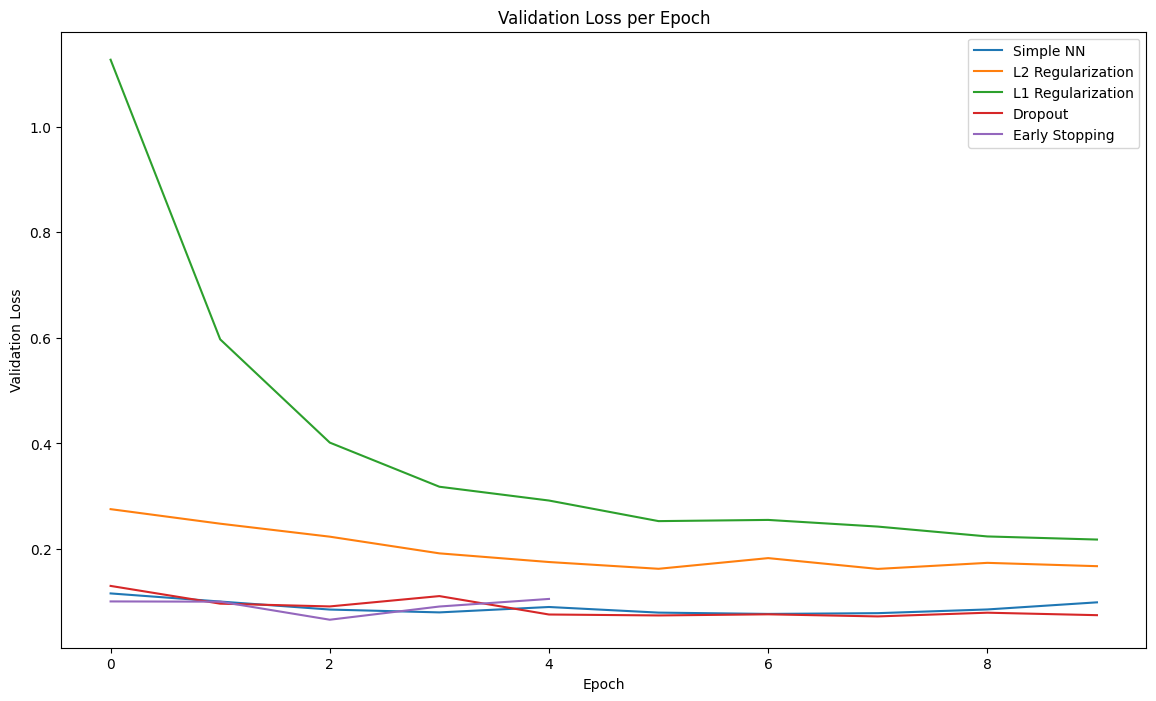

In [20]:
# Display results
results = {
    "Simple NN": history_simple.history,
    "L2 Regularization": history_l2.history,
    "L1 Regularization": history_l1.history,
    "Dropout": history_dropout.history,
    "Early Stopping": history_early_stopping.history
}

# Plot accuracy for each model
plt.figure(figsize=(14, 8))
for key in results.keys():
    plt.plot(results[key]['val_accuracy'], label=key)
plt.title('Validation Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

# Plot loss for each model
plt.figure(figsize=(14, 8))
for key in results.keys():
    plt.plot(results[key]['val_loss'], label=key)
plt.title('Validation Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

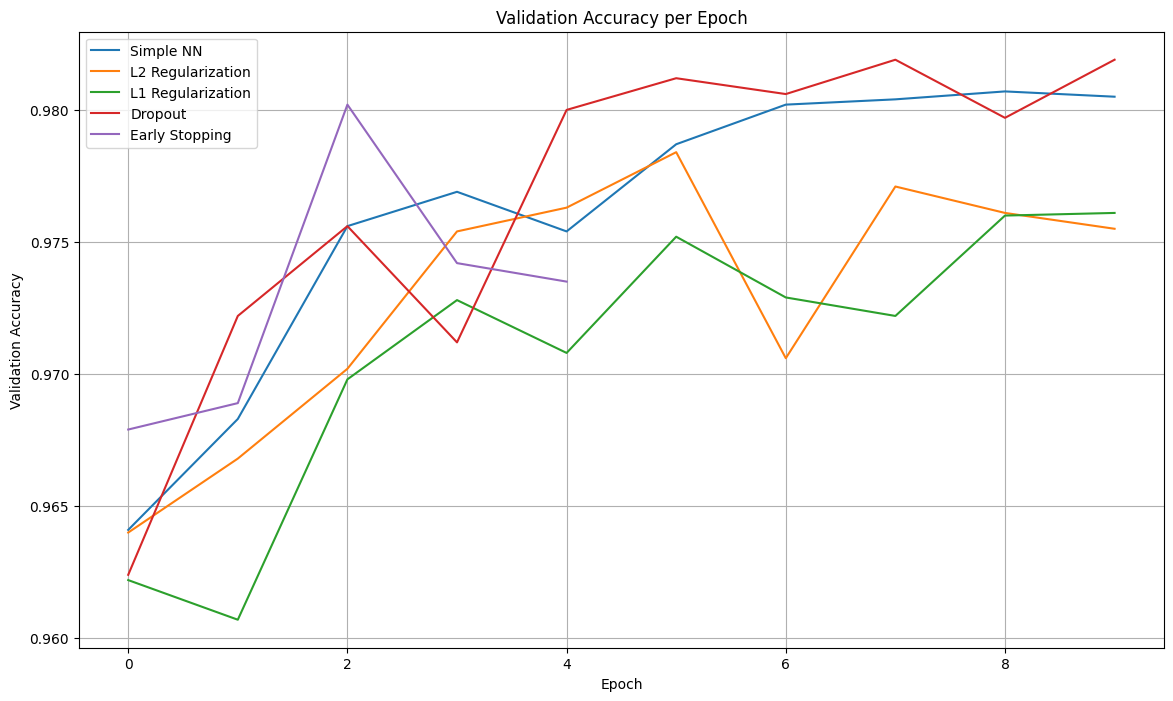

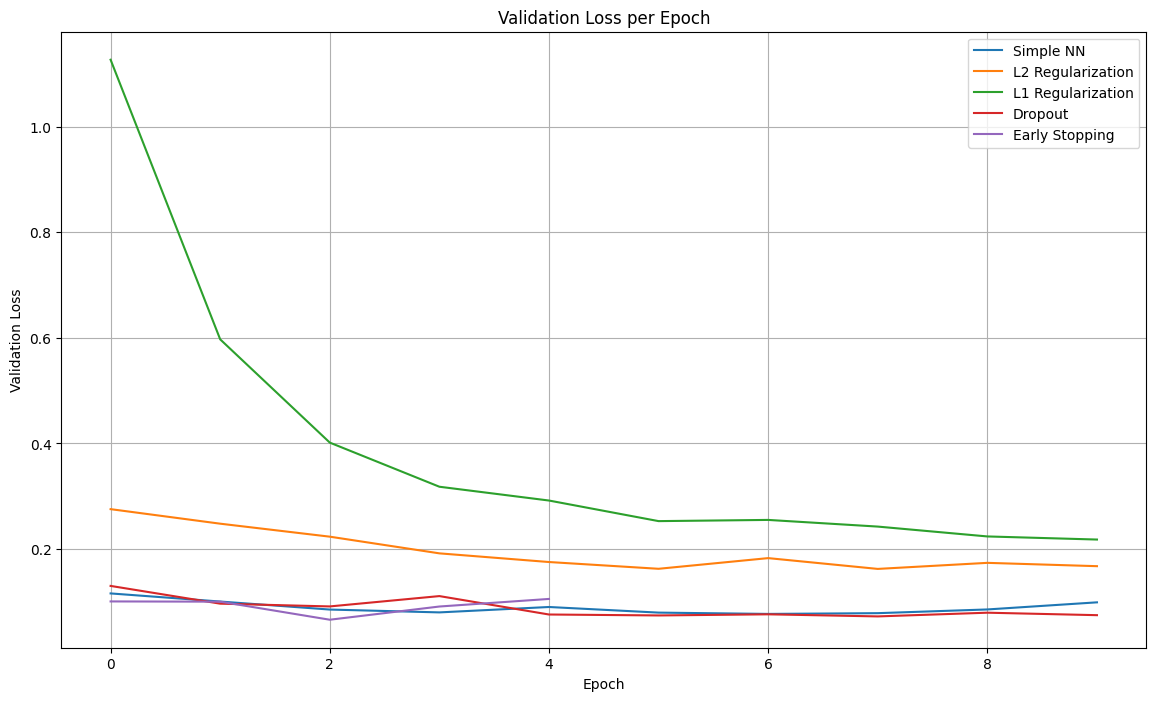

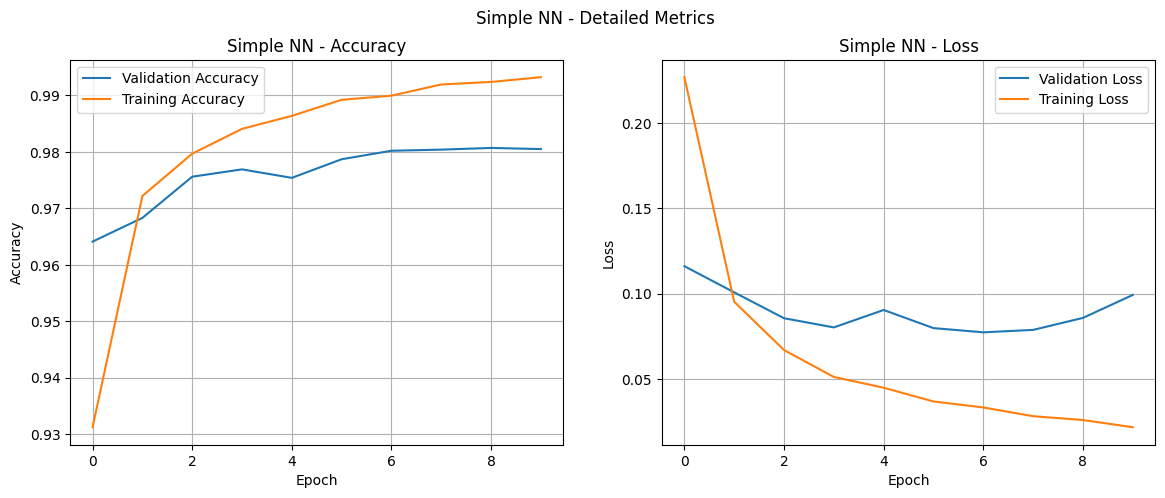

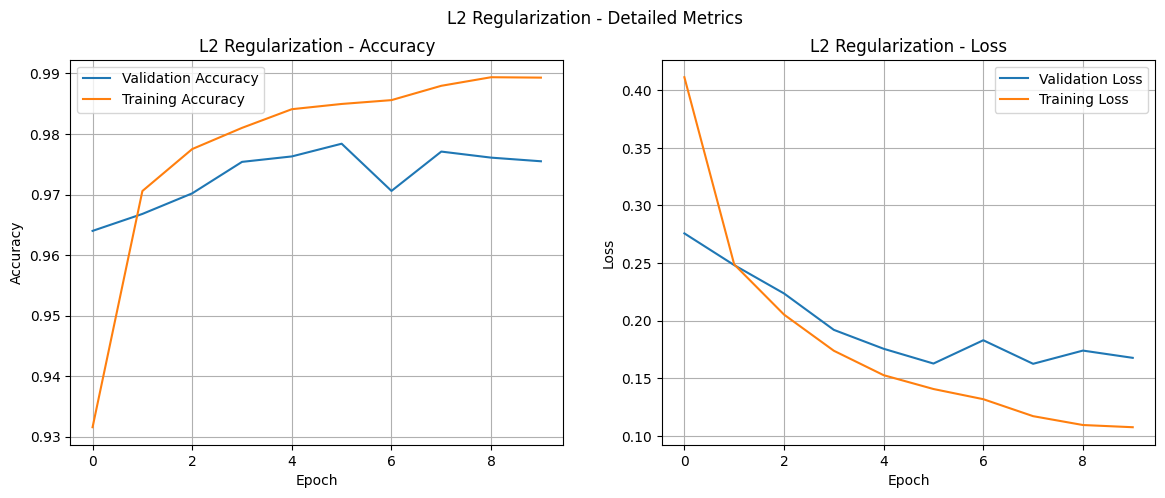

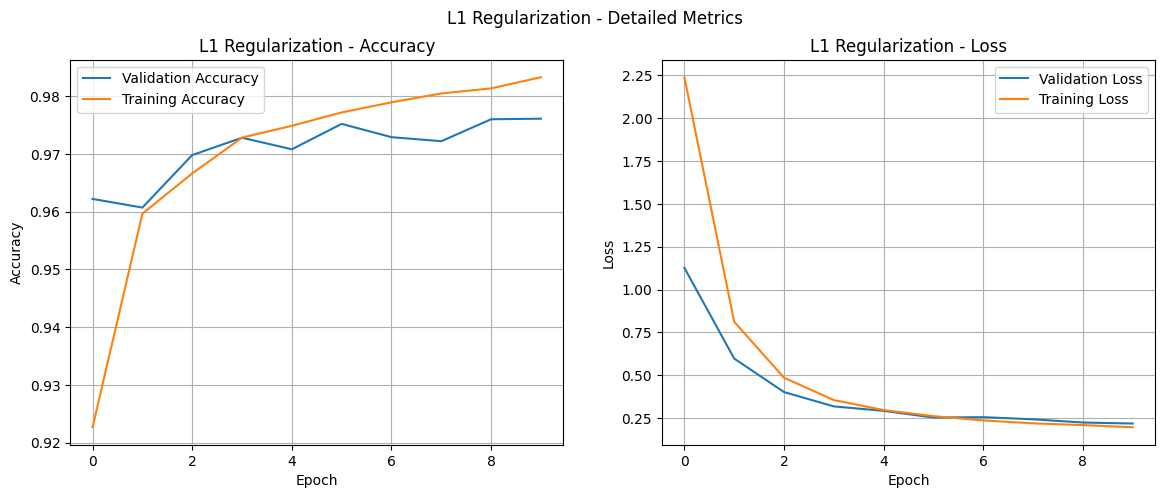

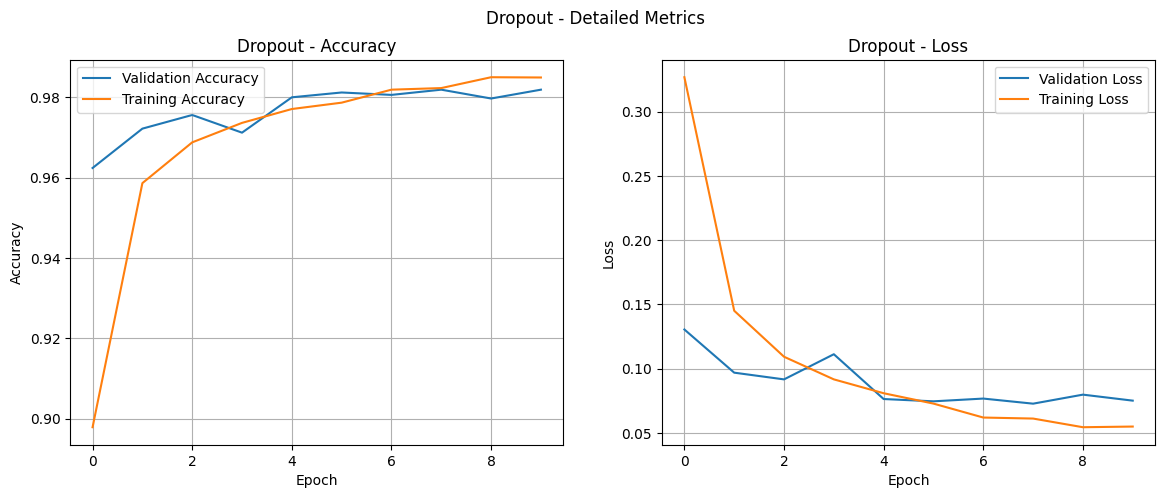

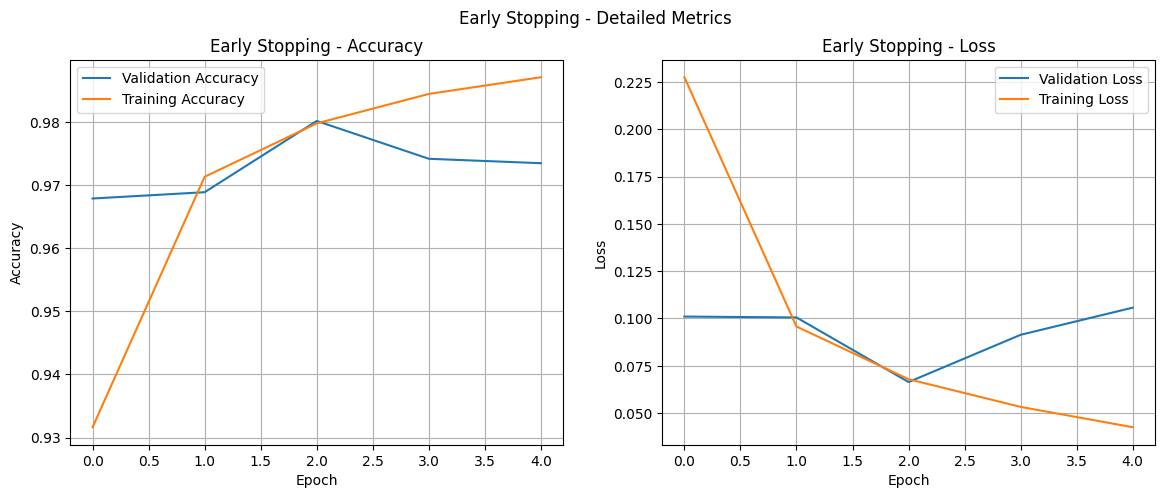

In [21]:
# Plot accuracy for each model
plt.figure(figsize=(14, 8))
for key in results.keys():
    plt.plot(results[key]['val_accuracy'], label=key)
plt.title('Validation Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot loss for each model
plt.figure(figsize=(14, 8))
for key in results.keys():
    plt.plot(results[key]['val_loss'], label=key)
plt.title('Validation Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot detailed accuracy and loss for each model
for key in results.keys():
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
    ax1.plot(results[key]['val_accuracy'], label='Validation Accuracy')
    ax1.plot(results[key]['accuracy'], label='Training Accuracy')
    ax1.set_title(f'{key} - Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend()
    ax1.grid(True)

    ax2.plot(results[key]['val_loss'], label='Validation Loss')
    ax2.plot(results[key]['loss'], label='Training Loss')
    ax2.set_title(f'{key} - Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()
    ax2.grid(True)

    plt.suptitle(f'{key} - Detailed Metrics')
    plt.show()

In [22]:
model_elastic = Sequential([
    Dense(hidden1_num_units, input_dim=input_num_units, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.0001, l2=0.0001)),
    Dense(hidden2_num_units, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.0001, l2=0.0001)),
    Dense(hidden3_num_units, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.0001, l2=0.0001)),
    Dense(hidden4_num_units, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.0001, l2=0.0001)),
    Dense(hidden5_num_units, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.0001, l2=0.0001)),
    Dense(output_num_units, activation='softmax'),
])

model_elastic.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_elastic = model_elastic.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))

Epoch 1/10
469/469 [==============================] - 5s 6ms/step - loss: 2.2987 - accuracy: 0.9203 - val_loss: 1.1245 - val_accuracy: 0.9572
Epoch 2/10
469/469 [==============================] - 3s 7ms/step - loss: 0.7917 - accuracy: 0.9604 - val_loss: 0.5669 - val_accuracy: 0.9644
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.4662 - accuracy: 0.9672 - val_loss: 0.4108 - val_accuracy: 0.9655
Epoch 4/10
469/469 [==============================] - 3s 5ms/step - loss: 0.3511 - accuracy: 0.9722 - val_loss: 0.3452 - val_accuracy: 0.9654
Epoch 5/10
469/469 [==============================] - 3s 5ms/step - loss: 0.2967 - accuracy: 0.9738 - val_loss: 0.2878 - val_accuracy: 0.9727
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.2623 - accuracy: 0.9774 - val_loss: 0.2582 - val_accuracy: 0.9759
Epoch 7/10
469/469 [==============================] - 3s 7ms/step - loss: 0.2410 - accuracy: 0.9793 - val_loss: 0.2577 - val_accuracy: 0.9724
Epoch 

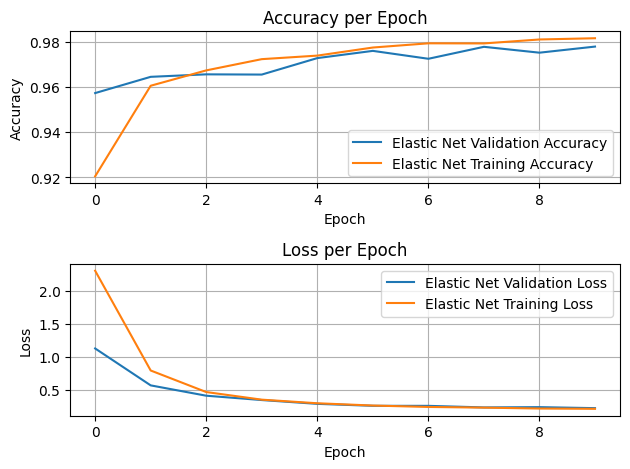

In [23]:
plt.subplot(2, 1, 1)
plt.plot(history_elastic.history['val_accuracy'], label='Elastic Net Validation Accuracy')
plt.plot(history_elastic.history['accuracy'], label='Elastic Net Training Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)


plt.subplot(2, 1, 2)
plt.plot(history_elastic.history['val_loss'], label='Elastic Net Validation Loss')
plt.plot(history_elastic.history['loss'], label='Elastic Net Training Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [24]:
import keras.backend as K
from keras.layers import Lambda, Dense

In [25]:
def inverted_dropout(x, dropout_rate=0.5):
    retain_prob = 1 - dropout_rate
    x = K.dropout(x, level=dropout_rate)
    x /= retain_prob
    return x

model_inverted_dropout = Sequential([
    Dense(hidden1_num_units, input_dim=input_num_units, activation='relu'),
    Lambda(inverted_dropout),
    Dense(hidden2_num_units, activation='relu'),
    Lambda(inverted_dropout),
    Dense(hidden3_num_units, activation='relu'),
    Lambda(inverted_dropout),
    Dense(hidden4_num_units, activation='relu'),
    Lambda(inverted_dropout),
    Dense(hidden5_num_units, activation='relu'),
    Lambda(inverted_dropout),
    Dense(output_num_units, activation='softmax'),
])

model_inverted_dropout.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history_inverted_dropout = model_inverted_dropout.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))

Epoch 1/10
469/469 [==============================] - 6s 6ms/step - loss: 1.5838 - accuracy: 0.5429 - val_loss: 0.5903 - val_accuracy: 0.8238
Epoch 2/10
469/469 [==============================] - 3s 5ms/step - loss: 0.4679 - accuracy: 0.8728 - val_loss: 0.3898 - val_accuracy: 0.9021
Epoch 3/10
469/469 [==============================] - 3s 5ms/step - loss: 0.3449 - accuracy: 0.9090 - val_loss: 0.3210 - val_accuracy: 0.9158
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2977 - accuracy: 0.9231 - val_loss: 0.3061 - val_accuracy: 0.9247
Epoch 5/10
469/469 [==============================] - 3s 7ms/step - loss: 0.2686 - accuracy: 0.9326 - val_loss: 0.2711 - val_accuracy: 0.9322
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2611 - accuracy: 0.9339 - val_loss: 0.2574 - val_accuracy: 0.9387
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 0.2444 - accuracy: 0.9404 - val_loss: 0.2624 - val_accuracy: 0.9357
Epoch 